<a href="https://colab.research.google.com/github/Liverson-Al/Exam/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url_new = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_vaccine = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'
df_new = pd.read_csv(url_new)
df_death = pd.read_csv(url_death)
df_vaccine = pd.read_csv(url_vaccine)

df_new=df_new.drop(labels=["Lat","Long"], inplace=False, axis=1)
df_death=df_death.drop(labels=["Lat","Long"], inplace=False, axis=1)
df_vaccine=df_vaccine.drop(labels=["UID", "Lat","Long_", "Combined_Key", "Province_State", "Admin2", "FIPS", "code3", "iso3", "iso2", "Population"], inplace=False, axis=1)
i=1
columns=df_new.columns
while(i<len(df_new.index)):
  if (df_new[columns[0]][i]==df_new[columns[0]][i-1]):
    country_name=df_new["Country/Region"][i-1]
    country_index=i-1
    while(df_new[columns[0]][i]==df_new[columns[0]][country_name]):
      for j in range(1,len(columns)):
        df_new[columns[j][country_index]]+=df_new[columns[j][i]]
      i+=1
  i+=1

i=1
columns=df_death.columns
while(i<len(df_death.index)):
  if (df_death[columns[0]][i]==df_death[columns[0]][i-1]):
    country_name=df_death["Country/Region"][i-1]
    country_index=i-1
    while(df_death[columns[0]][i]==df_death[columns[0]][country_name]):
      for j in range(1,len(columns)):
        df_death[columns[j][country_index]]+=df_death[columns[j][i]]
      i+=1
  i+=1



# **ДИНАМИКА НОВЫХ СЛУЧАЕВ**

Enter country: Russia
Show statistics for all time? (y/n): N
Enter first date (MM/DD/YY): 1/1/22
Enter second date (MM/DD/YY): 6/4/22


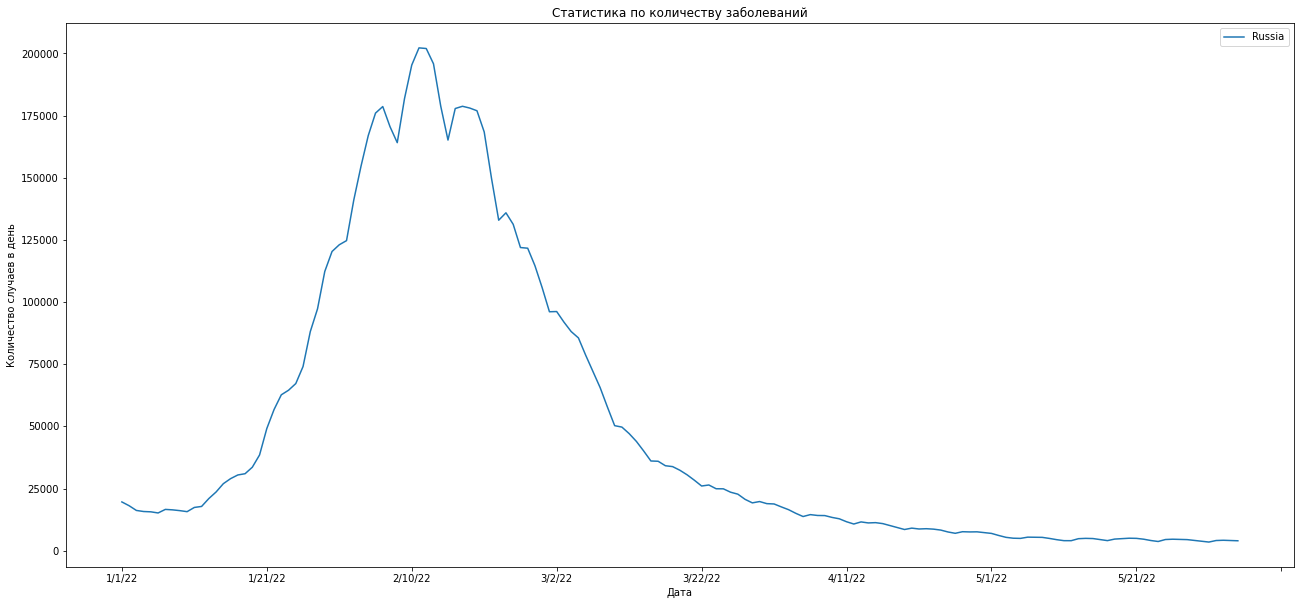

In [ ]:
country = input("Enter country: ")
date_check = str.lower(input("Show statistics for all time? (y/n): "))

if (date_check == "n"):
   date1 = str(input("Enter first date (MM/DD/YY): "))
   date2 = str(input("Enter second date (MM/DD/YY): "))
else:
  date1="1/22/20"
  date2=df_new.columns[-1]


df_new_copy=df_new.copy(deep=True)

country_row_new = df_new_copy.loc[(df_new_copy["Country/Region"] == country)]
if (country_row_new.shape[0]>1):
  country_row_new=country_row_new[:][:1]

country_row_new=country_row_new.drop(labels=["Country/Region"], inplace=False, axis=1)

country_row_new=country_row_new.transpose()
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})
shape=country_row_new.shape
i=shape[0]-1
while (i>1):
  country_row_new[country][i]-=country_row_new[country][i-1]
  i-=1
country_row_new=country_row_new[date1:date2]
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})

country_row_new.plot(figsize=(22,10),xlabel="Дата",ylabel="Количество случаев в день",title="Статистика по количеству заболеваний")


# **ДЛИНА КАЖДОЙ ВОЛНЫ**

In [43]:
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

df = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
df = df.set_index('date')

def waves(country):
  data = df[(df['location_key'] == country) & (df['new_confirmed'].notna())]['new_confirmed']

  peaks, _ = find_peaks(data, width=0, distance = 115) # индексы локальных максимумов
  #peaks = argrelextrema(data[data != 0].values, np.greater,order=30)[0]
  ilocs_min = argrelextrema(data[data != 0].values, np.less_equal,order=30)[0] # индексы локальных минимумов

  bottoms = data[ilocs_min] # данные локальных минимумов
  bottoms = bottoms.drop(bottoms[(bottoms == 0)].index[: bottoms[(bottoms == 0)].index.shape[0]-1]) # удаляем нулевые элементы, если их больше одного
  
  tops = data[peaks] # данные локальных максимумов

  plt.subplots(figsize=(22, 10))
  data.plot()
  plt.plot(peaks, data[peaks], "v") #локальные максимумы
  plt.plot(ilocs_min+data[data == 0].shape[0],data[ilocs_min+data[data == 0].shape[0]],"^") #локальные минимумы
  plt.title(country, fontsize=10)
  plt.show()

  waves = tops.combine(bottoms, max, fill_value = 0)
  waves = pd.DataFrame(waves)

  display(waves) 




Enter country: 
RU


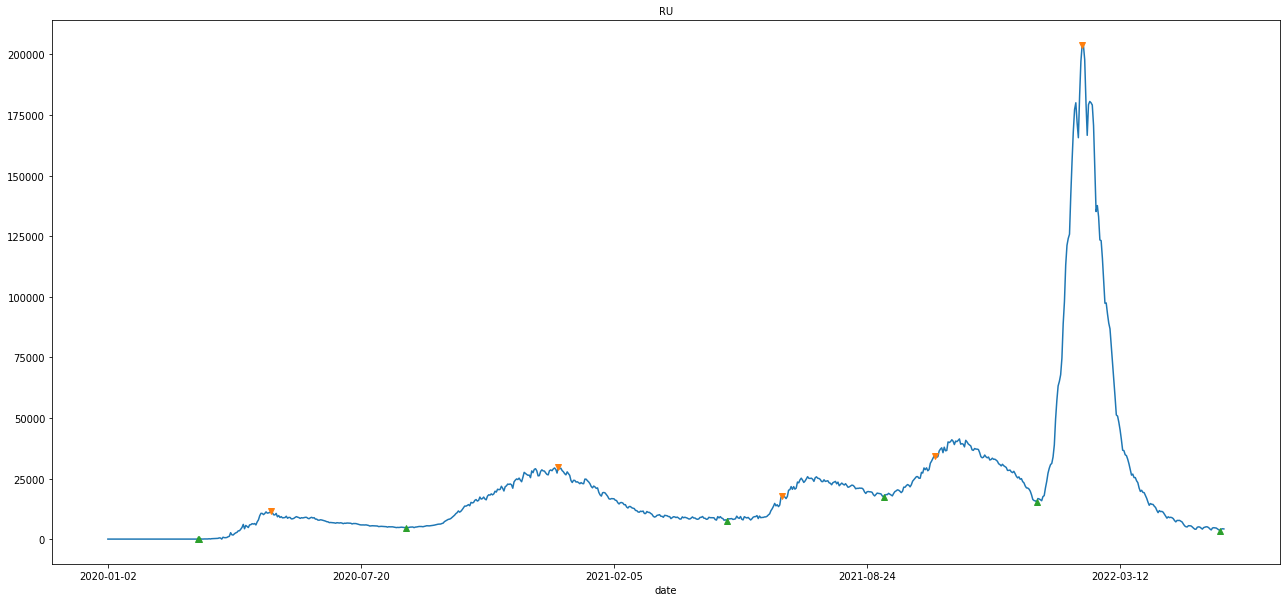

,new_confirmed
date,
2020-01-04,0.0
2020-05-10,11656.0
2020-06-16,7843.0
2020-12-23,29935.0
2021-02-24,11198.0
2021-06-18,17906.0
2021-06-28,20616.0
2021-10-17,34325.0
2021-10-27,40096.0


In [45]:
print("Enter country: ")
country = input()
waves(country)

# **ДИНАМИКА СМЕРТНОСТИ**

Enter country: Ukraine
Show statistics for all time? (y/n): Y


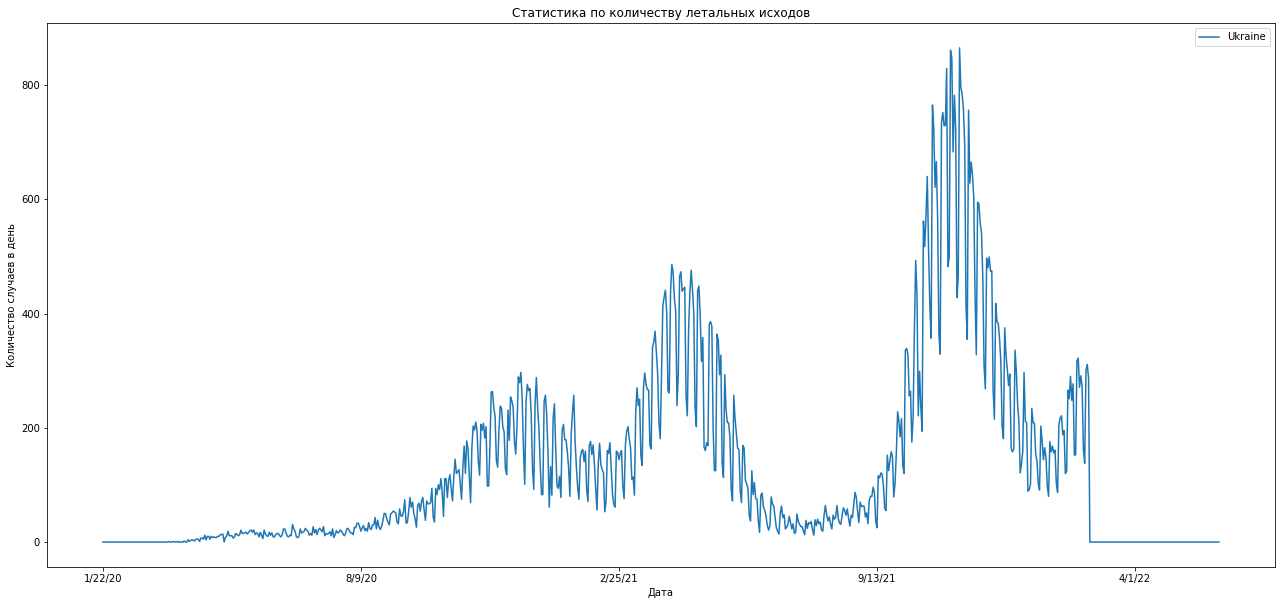

In [ ]:
country = input("Enter country: ")
date_check = str.lower(input("Show statistics for all time? (y/n): "))

if (date_check == "n"):
   date1 = str(input("Enter first date (MM/DD/YY): "))
   date2 = str(input("Enter second date (MM/DD/YY): "))
else:
  date1="1/22/20"
  date2=df_death.columns[-1]

df_death_copy=df_death.copy(deep=True)
country_row_new = df_death_copy.loc[(df_death_copy["Country/Region"] == country)]
if (country_row_new.shape[0]>1):
  country_row_new=country_row_new[:][:1]
country_row_new=country_row_new.drop(labels=["Country/Region","Province/State"], inplace=False, axis=1)

country_row_new=country_row_new.transpose()
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})
shape=country_row_new.shape
i=shape[0]-1
while (i>1):
  country_row_new[country][i]-=country_row_new[country][i-1]
  i-=1
country_row_new=country_row_new[date1:date2]
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})

country_row_new.plot(figsize=(22,10),xlabel="Дата",ylabel="Количество случаев в день",title="Статистика по количеству летальных исходов")

# **ПРОВЕРКА ГИПОТЕЗ: 1) СНИЖАЛОСЬ ЛИ ЧИСЛО НОВЫХ СЛУЧАЕВ С РОСТОМ ВАКЦИНАЦИИ; 2) СНИЖАЛОСЬ ЛИ ЧИСЛО СМЕРТЕЙ С РОСТОМ ВАКЦИНАЦИИ**

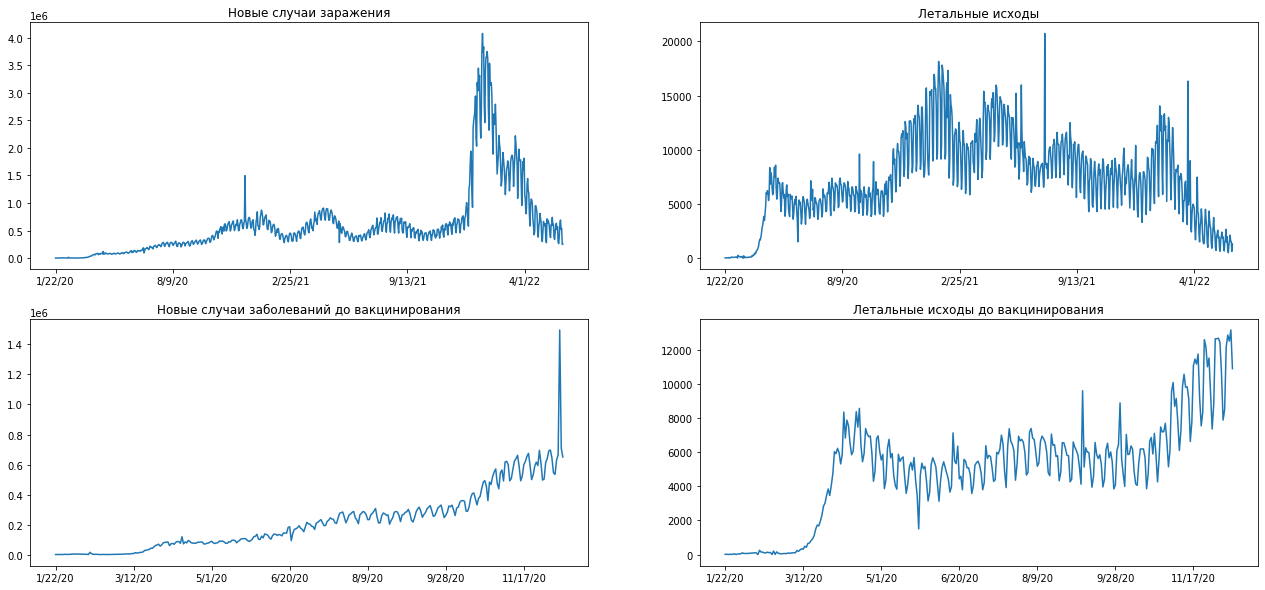

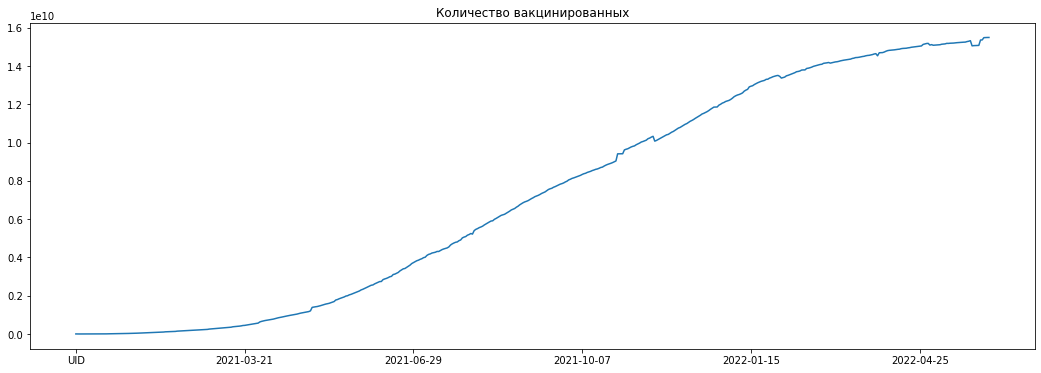

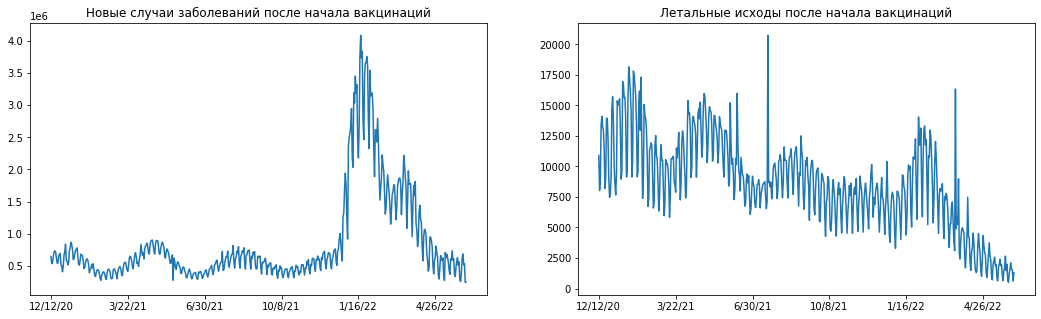

In [ ]:


df_new = pd.read_csv(url_new)
df_death = pd.read_csv(url_death)
df_vaccine = pd.read_csv(url_vaccine)

df_new=df_new.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)
df_death=df_death.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)
df_vaccine=df_vaccine.drop(labels=["Lat","Long_", "Combined_Key", "Province_State", "Admin2", "FIPS", "code3", "iso3", "iso2", "Population"], inplace=False, axis=1)
del df_death["Country/Region"]
del df_new["Country/Region"]     
del df_vaccine["Country_Region"]

news = df_new.sum()
deaths = df_death.sum()
vaccines = df_vaccine.sum()

s = len(news)
cols = news.index 
while(s>2):
  news[cols[s-1]] -= news[cols[s-2]]
  s-=1

s = len(deaths)
cols = deaths.index 
while(s>2):
  deaths[cols[s-1]] -= deaths[cols[s-2]]
  s-=1

date1="1/22/20"
date2="12/12/20"
date_end = cols[-1]



news_before=news[date1:date2]
deaths_before = deaths[date1:date2]
news_after = news[date2:date_end]
deaths_after = deaths[date2:date_end]

plt.figure(figsize=(22, 10))
plt.subplot(2, 2, 1)
news.plot(title = "Новые случаи заражения")
plt.subplot(2, 2, 2)
deaths.plot(title = "Летальные исходы")
plt.subplot(2, 2, 3)
news_before.plot(title = "Новые случаи заболеваний до вакцинирования")
plt.subplot(2, 2, 4)
deaths_before.plot(title = "Летальные исходы до вакцинирования")
plt.show()

plt.figure(figsize=(18, 6))
vaccines.plot(title = "Количество вакцинированных")
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
news_after.plot(title = "Новые случаи заболеваний после начала вакцинаций")
plt.subplot(1, 2, 2)
deaths_after.plot(title = "Летальные исходы после начала вакцинаций")

<BarContainer object of 16 artists>

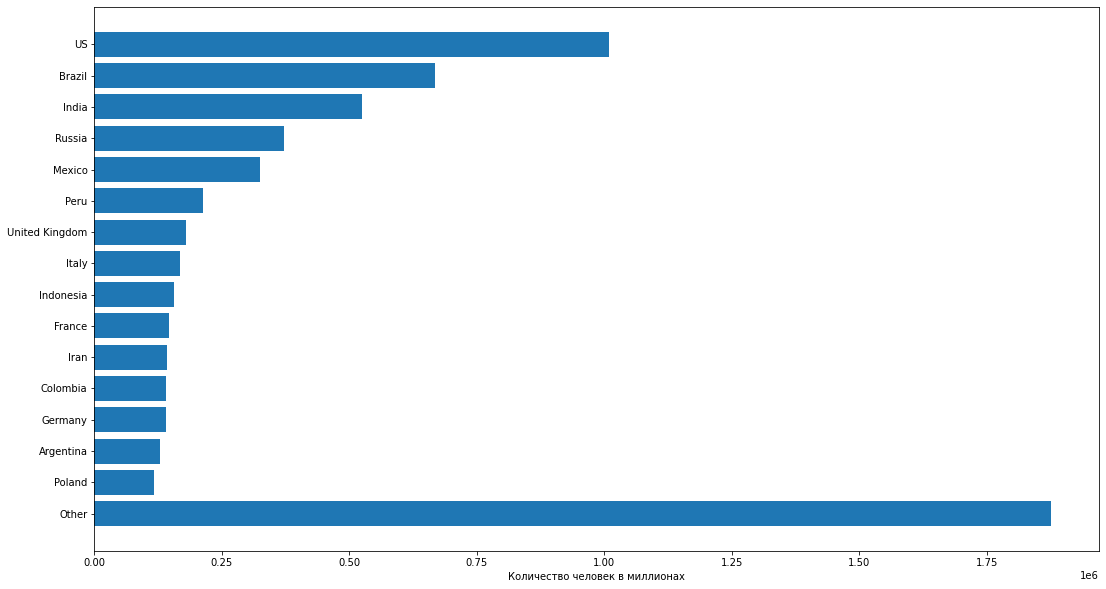

In [ ]:

# СВОЙ ЛЮБОЙ АНАЛИЗ НА ВЫБОР 
# топ 15 стран по количеству смертей от ковида за всё время его существования 

df_death = pd.read_csv(url_death)
df_death=df_death.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)

result = []
for q in df_death.iloc:
  result.append((q[0], q[-1]))

result.sort(key = lambda x: x[1])
other = sum(i[1] for i in result[:-15])
result = result[-15:]
result.insert(0, ("Other", other))
plt.figure(figsize=(18, 10))
plt.xlabel("Количество человек в миллионах")
plt.barh([i[0] for i in result], [i[1] for i in result])